In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.diagnostic import acorr_ljungbox
#import kalman filter
from statsmodels.tsa.statespace.kalman_filter import KalmanFilter
from statsmodels.tsa.filters.hp_filter import hpfilter
from scipy.stats import jarque_bera
from scipy.signal import find_peaks
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
from sklearn.preprocessing import StandardScaler
import stumpy

In [7]:
data = pd.read_excel('../data/monthly_data/final_gdp_exchange_rate_data.xlsx')
data.index = data['Date']
data.drop(columns=['Date'], inplace=True)


In [8]:
data

,Real_GDP_Growth,Inflation_Rate,GDP_at_market_prices_monthly,GDP per capita in GEL_monthly,"GDP per capita, USD_monthly",GDP in mil. USD_monthly,NEER (Dec-2011=100),Real Effective Exchange Rate - Index (Dec-11=100),GEL/USD Real Exchange Rate - Index (Dec-11=100),GEL/EUR Real Exchange Rate - Index (Dec-11=100),GEL/TRY Real Exchange Rate - Index (Dec-11=100),GEL/RUB Real Exchange Rate - Index (Dec-11=100),Monetary_Policy_Rate
Date,,,,,,,,,,,,,
2012-01-01,0.063858,0.4908,4048.159300,1085.659639,664.089139,2476.265633,99.820665,99.919231,99.511908,103.022054,98.387014,99.936201,0.0650
2012-02-01,0.073270,0.2266,4079.360049,1094.108059,668.206236,2491.528697,98.305027,98.260829,99.964738,100.936158,93.959904,95.283318,0.0650
2012-03-01,0.059115,-0.1814,4018.528252,1077.529070,662.810021,2471.701315,98.876300,98.255228,99.316257,99.896873,95.182906,93.213758,0.0650
2012-04-01,0.069257,-0.0345,3988.114481,1069.393240,658.241599,2454.645352,100.007675,98.958284,100.004242,100.694528,94.715043,94.187934,0.0575
2012-05-01,0.085395,-0.8506,4036.559271,1082.542011,663.091684,2472.555588,101.752493,100.140605,99.882290,103.149910,95.482322,97.115176,0.0575
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-01,0.120370,-0.0866,14408.407059,3899.960480,1439.768165,5319.238801,164.169818,108.026232,72.254435,92.675357,148.781445,120.091467,0.0800
2024-09-01,0.082758,0.2868,14497.514005,3923.963124,1444.922154,5338.371883,164.035851,107.514859,72.126407,91.777167,146.152293,122.632108,0.0800
2024-10-01,0.110218,0.2765,14607.554636,3953.929017,1440.460832,5321.730998,165.081385,107.620006,71.749224,92.695226,142.316323,127.543717,0.0800


/var/folders/50/97r9rj4j6s9f_0_j75x32sxr0000gn/T/ipykernel_97292/2576259284.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


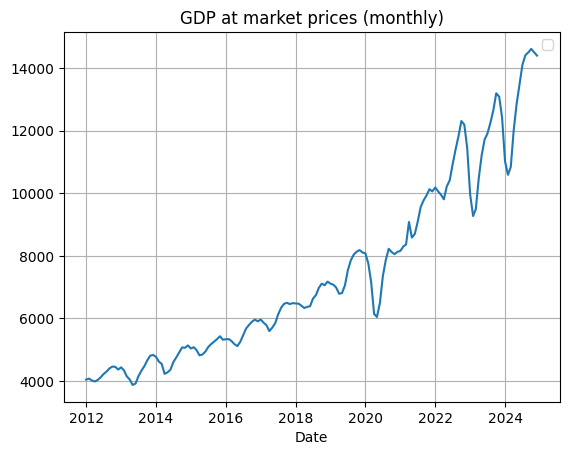

In [9]:
# use Date column as x-axis
plt.plot(data['GDP_at_market_prices_monthly'])
plt.xlabel('Date')
plt.title('GDP at market prices (monthly)')
plt.grid(True)
plt.legend()
plt.show()